In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as p9

### 1. Loading the data
1. Load the data in pandas. (Hint: check the separator that is used in the file, you can pass a different separator to `read_csv()` using the `sep` argument)
2. Take a look at the data. As you can see, the Topic is read as a column and not as index. You can fix this by passing `index_col='Topic'` to `read_csv()`.

In [161]:
filepath = '../data/Health__lifestyle__health_care_use_and_supply__causes_of_death__from_1900_21122022_143458.csv'
df = pd.read_csv(filepath, sep=';', index_col='Topic')
df.head()

,Unnamed: 1,1900,1940,1980,1990,2000,2010,2019,2020,2021,2022
Topic,,,,,,,,,,,
Demographic key figures|Population on January 1,x 1 000,5104,8834,14091,14893,15864,16575,17282,17408,17475,17591
Demographic key figures|Live born children,x 1 000,163,185,181,198,207,184,170,169,179,.
Demographic key figures|Deaths,x 1 000,92,88,114,129,141,136,152,169,171,.
Health status|Persons in (very) good health,%,.,.,.,81.7,80.4,80.3,78.7,81.5,80.5,.
Health status|Persons with complete dentures,%,.,.,.,23.7,15.7,.,.,.,.,.


### 2. Cleaning up the data
1. Take a look at the data. How are missing data represented?
2. Replace the value that is used for missing data with NaN. (hint: You can replace values using DataFrame.replace(). You can use numpy.nan to represent NaN values)

In [162]:
df = df.rename(columns={'Unnamed: 1': 'unit'})

In [163]:
df = df.replace('.', np.nan)

In [164]:
# Not yet in a question:
for column in ['1900', '1940', '1980', '1990', '2000', '2010', '2019', '2020', '2021', '2022']:
 df[column] = df[column].astype('float')

## 3. External causes of death bar graph 
1. Create a bargraph that shows the number of deaths per 100 000 people for the 4 external causes of mortality.

NB: This still needs much more guidance

In [138]:
topics = ['Causes of death|External causes of mortality|Suicide',
          'Causes of death|External causes of mortality|Accidental drowning',
          'Causes of death|External causes of mortality|Accidental falls',
          'Causes of death|External causes of mortality|Transport accidents']
external_causes_df = df.loc[topics]
mapper = {'Causes of death|External causes of mortality|Suicide': 'Suicide',
          'Causes of death|External causes of mortality|Accidental drowning': 'Accidental drowning',
          'Causes of death|External causes of mortality|Accidental falls': 'Accidental falls',
          'Causes of death|External causes of mortality|Transport accidents': 'Transport accidents'}
external_causes_df = external_causes_df.rename(index=mapper)

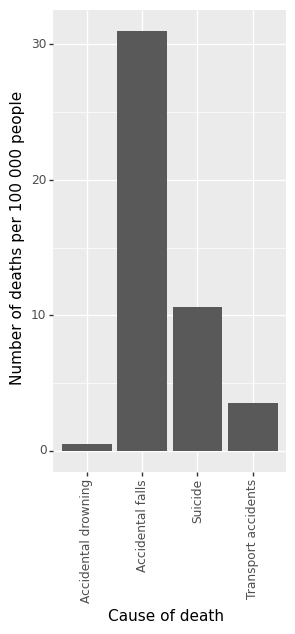

<ggplot: (703027505)>

In [157]:
(p9.ggplot(data=external_causes_df,
           mapping=p9.aes(x=external_causes_df.index, y='2021')) # hint!
    + p9.geom_bar(stat='identity') # hint!
    + p9.theme(axis_text_x = p9.element_text(angle=90))
    + p9.ylab("Number of deaths per 100 000 people")
    + p9.xlab("Cause of death")
    + p9.theme(figure_size=(3, 6))
)

Other questions:
* Write a function that only keeps the last part of the index names (i.e. splitting on '|')
* Hypothesis: Proportion of HIV-infected people that develop AIDS has declined over the years.
* Population, live born children, deaths over the years (including 2022). Missing data!
* Expenditure. See if mortality / persons in (very) good health correlate to healthcare costs. Costs as a percentage of the GDP. Life expectancy
* Merge with some other data
* External causes of mortality bar plot